In [1]:
import sklearn 
import numpy as np

In [2]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [9]:
mol1 = np.array([1,0.26,0.39])
mol2 = np.array([1,0.94,0.61])
mol3 = np.array([1,0.52,0.93])

mols = np.array([mol1,mol2,mol3])

pca = PCA(n_components=3)
pca.fit(mols)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.6776179 0.3223821 0.       ]
[0.50939423 0.35135573 0.        ]


In [6]:
np.var(mols,axis=0)

array([0.        , 0.07848889, 0.04915556])

In [64]:
from rdkit import Chem

a = "C#COC"
mol = Chem.MolFromSmiles(a)

len(mol.GetAtoms())

4

In [66]:
from molsim.data import * 

import pandas as pd 

df = pd.read_csv("molsim/data/QM9_Data.csv",index_col="SMILES")
#df["index"] = np.arange(len(df))
#df[np.logical_and((df["Isotropic Polarizability"] > 30).to_numpy(), (df["Isotropic Polarizability"] < 35).to_numpy())]["SMILES"].to_numpy()
df.loc[mols3]#.to_csv("Mini_DF.csv",index_label='index')


ModuleNotFoundError: No module named 'entropy_estimators'

In [60]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'Optional[FilePathOrBuffer]' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'Optional[str]' = None, columns: 'Optional[Sequence[Label]]' = None, header: 'Union[bool_t, List[str]]' = True, index: 'bool_t' = True, index_label: 'Optional[IndexLabel]' = None, mode: 'str' = 'w', encoding: 'Optional[str]' = None, compression: 'CompressionOptions' = 'infer', quoting: 'Optional[int]' = None, quotechar: 'str' = '"', line_terminator: 'Optional[str]' = None, chunksize: 'Optional[int]' = None, date_format: 'Optional[str]' = None, doublequote: 'bool_t' = True, escapechar: 'Optional[str]' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'Optional[str]' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters

In [63]:
import numpy as np
from math import log, e


def entropy(labels, base=None):
    """ Computes entropy of label distribution. """

    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)

    return ent

entropy(np.array([7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]),base=2)

0.6402312320438752

In [55]:
entropy(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),base=2)

0.12565805017256743

In [38]:
entropy(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),base=2)

0

In [2]:
import pandas as pd
import numpy as np 
import umap 

df = pd.read_csv("exmoset/data/QM9_Data.csv")

In [14]:
data = df.iloc[:,1:].to_numpy()

In [15]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

In [31]:
df

,SMILES,Rotational Constant A,Rotational Constant B,Rotational Constant C,Dipole Moment,Isotropic Polarizability,Energy of HOMO,Energy of LUMO,HOMO-LUMO Gap,Electronic Spatial Extent,ZPVE,Internal Energy at 0K,Internal Energy at 298.15K,Enthalpy at 298.15K,Free Energy at 298.15K,Heat Capacity at 298.15K
0,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469
1,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316
2,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002
3,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574
4,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658
133881,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697
133882,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972
133883,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796


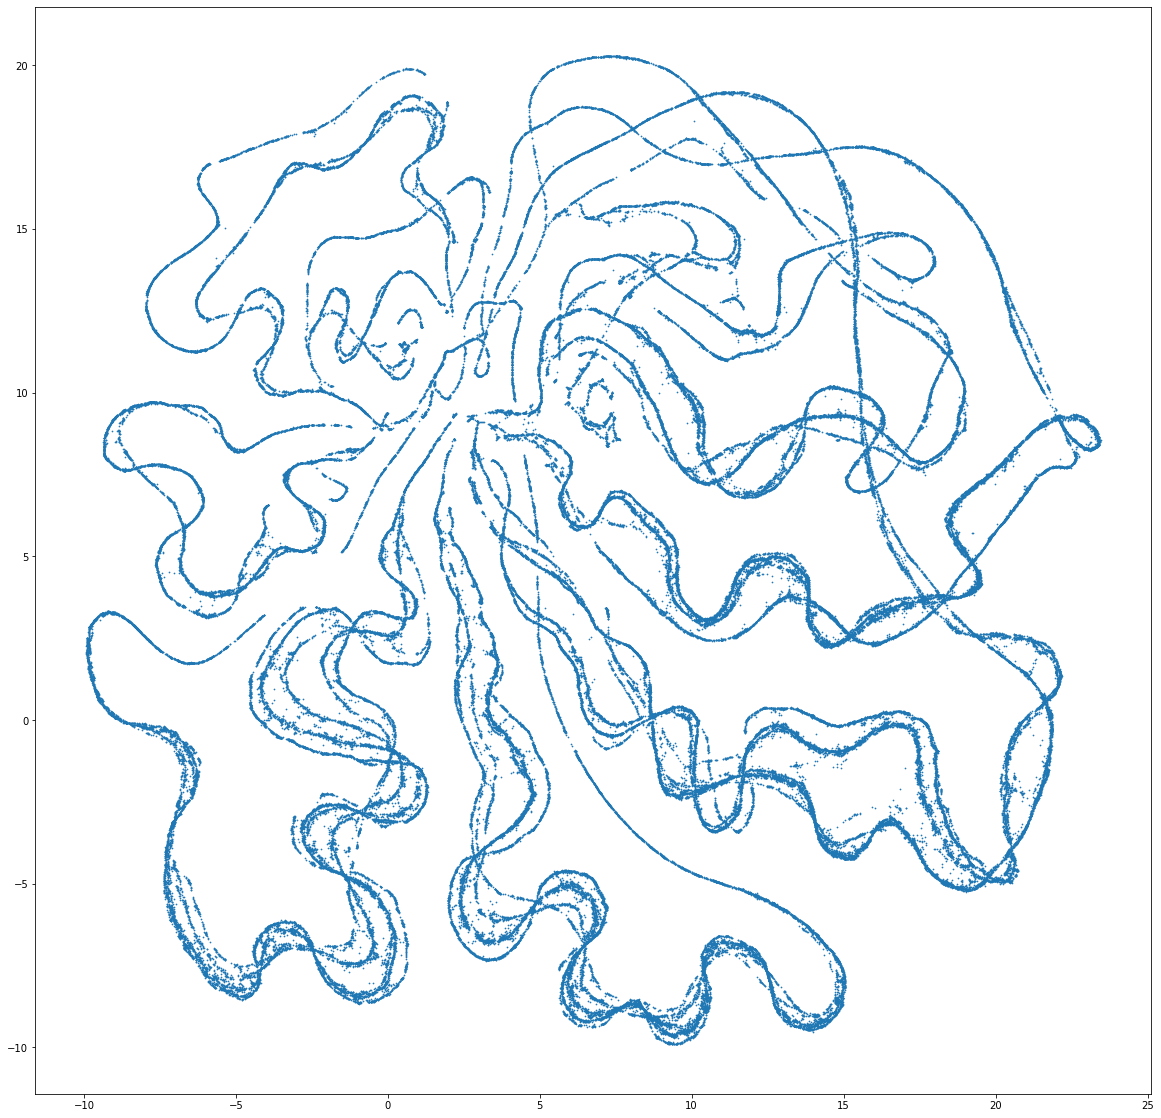

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
plt.scatter(embedding[:,0],embedding[:,1],s=0.5)
plt.show()

In [26]:
reducer3D = umap.UMAP(n_components=3)
embedding3D = reducer3D.fit_transform(data)

<Figure size 432x288 with 0 Axes>

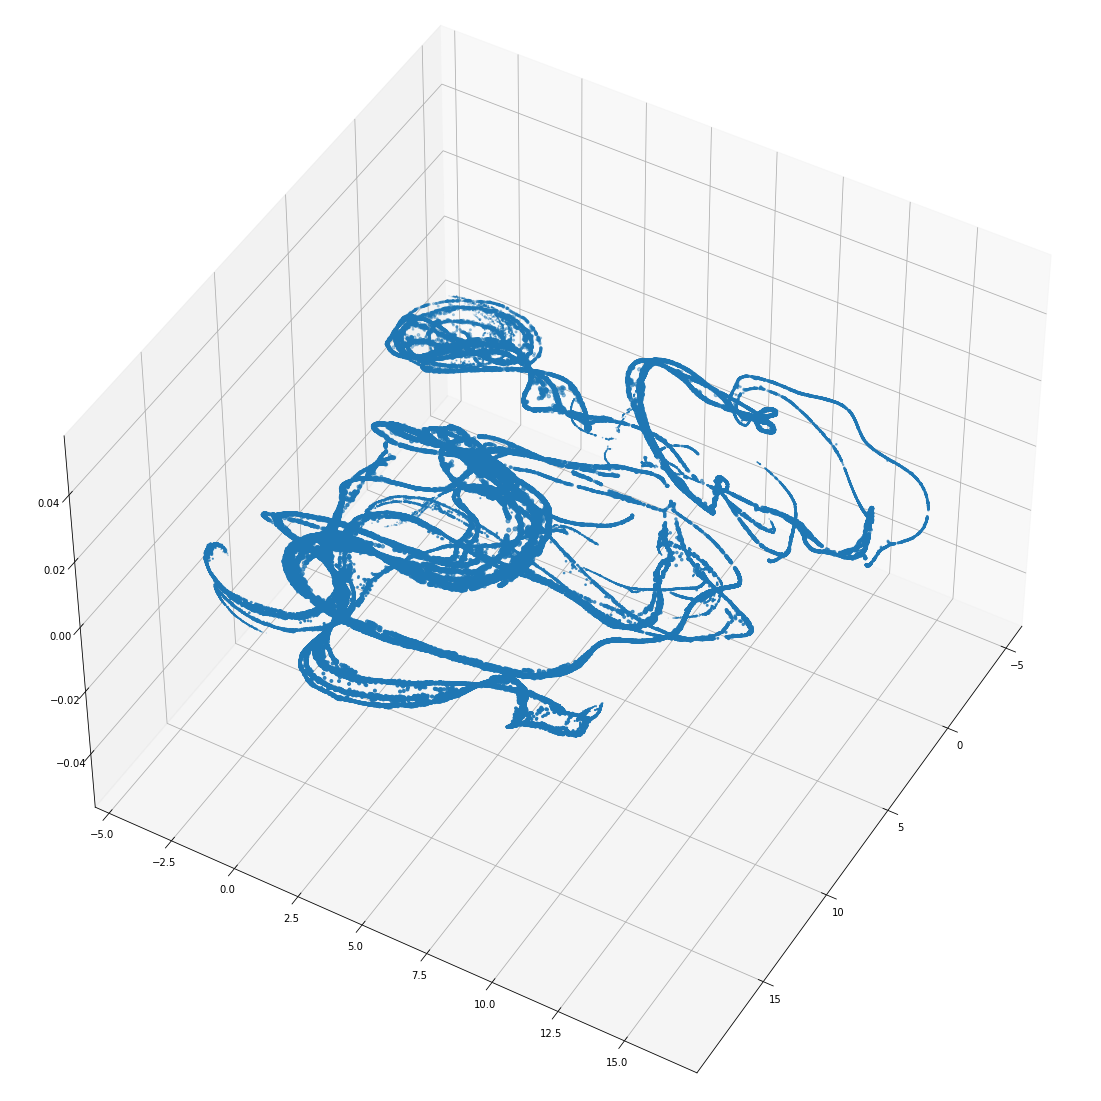

In [30]:

fig = plt.figure()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45., azim=30)
plt.scatter(embedding3D[:,0],embedding3D[:,1],embedding3D[:,2])
plt.show()